### Please answer below questions using both SQL and Python
1. How many products people usually order?
2. Which products are ordered the most?
3. Which product is most likely to be added first in cart?
4. What is the time at which people usually order products?

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products = pd.read_csv("order_products.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

In [3]:
print(aisles.shape)
print(departments.shape)
print(order_products.shape)
print(orders.shape)
print(products.shape)

(134, 2)
(21, 2)
(33819106, 3)
(3421083, 6)
(49688, 4)


In [4]:
aisles_products = pd.merge(aisles, products, on = "aisle_id")
aisles_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       49688 non-null  int64 
 1   aisle          49688 non-null  object
 2   product_id     49688 non-null  int64 
 3   product_name   49688 non-null  object
 4   department_id  49688 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.3+ MB


In [5]:
ord_prod_ord = pd.merge(order_products, orders, on = "order_id")
ord_prod_ord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   user_id                 int64  
 4   order_number            int64  
 5   order_dow               int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
dtypes: float64(1), int64(7)
memory usage: 2.3 GB


In [6]:
ord_prod_ord.shape

(33819106, 8)

In [7]:
ais_prod_depart = pd.merge(aisles_products, departments, on="department_id")
ais_prod_depart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49688 entries, 0 to 49687
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   aisle_id       49688 non-null  int64 
 1   aisle          49688 non-null  object
 2   product_id     49688 non-null  int64 
 3   product_name   49688 non-null  object
 4   department_id  49688 non-null  int64 
 5   department     49688 non-null  object
dtypes: int64(3), object(3)
memory usage: 2.7+ MB


In [8]:
new = pd.merge(ais_prod_depart, ord_prod_ord, on = "product_id")
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33819106 entries, 0 to 33819105
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   aisle_id                int64  
 1   aisle                   object 
 2   product_id              int64  
 3   product_name            object 
 4   department_id           int64  
 5   department              object 
 6   order_id                int64  
 7   add_to_cart_order       int64  
 8   user_id                 int64  
 9   order_number            int64  
 10  order_dow               int64  
 11  order_hour_of_day       int64  
 12  days_since_prior_order  float64
dtypes: float64(1), int64(9), object(3)
memory usage: 3.5+ GB


In [9]:
add_to_cart_order = new['add_to_cart_order']
add_to_cart_order.value_counts()

1      3346083
2      3182490
3      2988129
4      2773069
5      2542770
        ...   
144          1
140          1
139          1
138          1
145          1
Name: add_to_cart_order, Length: 145, dtype: int64

In [10]:
add_to_cart_order.describe()

count    3.381911e+07
mean     8.367738e+00
std      7.139540e+00
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      1.450000e+02
Name: add_to_cart_order, dtype: float64

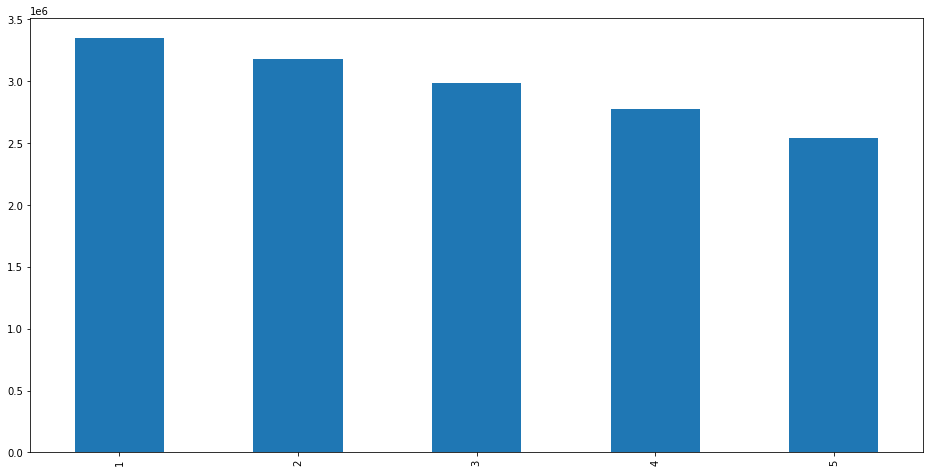

In [11]:
plt.figure(figsize=(16,8))
add_to_cart_order.value_counts().head(5).plot.bar()
plt.show()

People usually order 1 product.

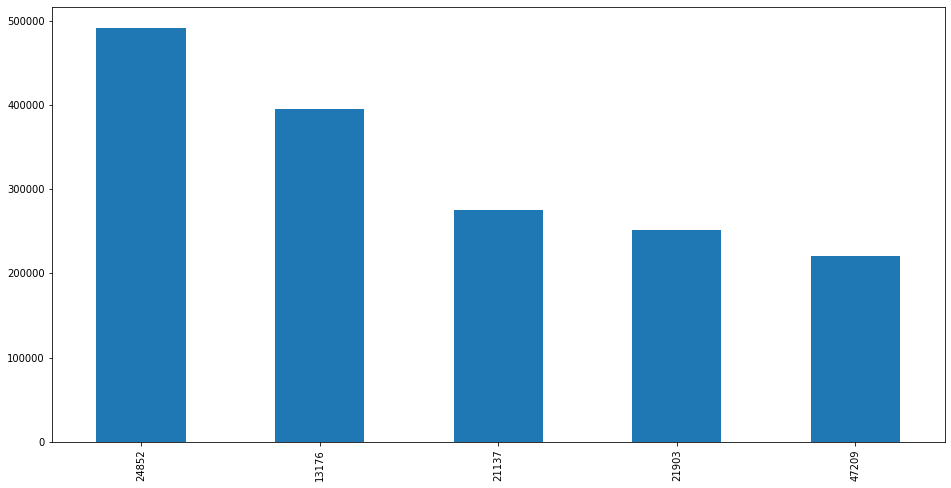

In [12]:
plt.figure(figsize=(16,8))
new['product_id'].value_counts().head(5).plot.bar()
plt.show()

Product_id 24852 is the product that customers order most.

3. Which product is most likely to be added first in cart?

In [23]:
# 满足 add_to_cart_order= 1 的 max(count(product_id))
new2 = DataFrame(new, new['add_to_cart_order'] <= 1)

plt.figure(figsize=(16,8))
new2['product_id'].value_counts().head(5).plot.bar()
plt.show()

NameError: name 'DataFrame' is not defined

In [ ]:
plt.figure(figsize=(16,8))
new['product_id'].value_counts().head(5).plot.bar()
plt.show()

Product_id is most likely to be added first in cart. 

In [14]:
# order_dow
new['order_dow'].describe

<bound method NDFrame.describe of 0           0
1           0
2           2
3           2
4           5
           ..
33819101    1
33819102    2
33819103    1
33819104    1
33819105    4
Name: order_dow, Length: 33819106, dtype: int64>

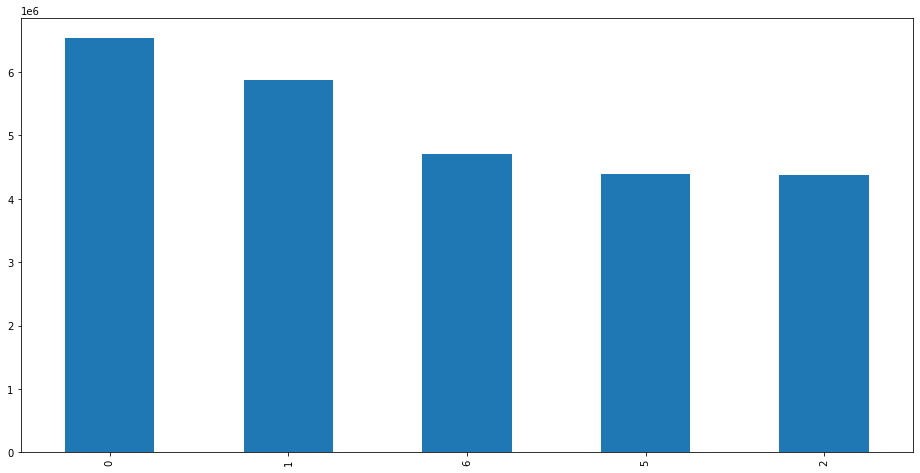

In [15]:
plt.figure(figsize=(16,8))
new['order_dow'].value_counts().head(5).plot.bar()
plt.show()

People usually order on Sunday.

In [16]:
while order_dow = 0:
    plt.figure(figsize=(16,8))
    new['order_hour_of_day'].value_counts().head(5).plot.bar()
    plt.show()


SyntaxError: invalid syntax (<ipython-input-16-bf01548b6b5b>, line 1)